## This notebook does Fourier deconvolution of various ROIs across the brain

The main point is to check:
- data quality (is there any BOLD response detectible?) 
- model quality (does the HRF capture the shape of the BOLD response, is the timing in line with expectations?)

In [4]:
import pandas as pd
import numpy as np
import os

import glob
import re
import seaborn as sns

import nideconv
from nideconv import GroupResponseFitter

import matplotlib.pyplot as plt
%matplotlib inline

## 1. M1

In [9]:
events = pd.read_pickle('./derivatives/all_subjects_events.pkl')
confounds = pd.read_pickle('./derivatives/all_subjects_confounds.pkl')
df = pd.read_pickle('./derivatives/all_subjects_roi_timeseries.pkl')

events['onset'] -= 1.5  # slice timing correction

In [13]:
events.loc[events['event_type'].isin(['cue_left', 'cue_right', 'cue_neutral']), 'event_type'] = 'cue'
events.loc[events['event_type'].isin(['easy', 'hard']), 'event_type'] = 'stim'
events['event_type'] = events['event_type'].replace({'cue_left': 'cue', 'cue_right': 'cue', 'cue_neutral': 'cue',
                                                     'easy': 'stim', 'hard': 'stim',
                                                     'feedback_+0.04': 'feedback',
                                                     'feedback_+0.025': 'feedback',
                                                     'feedback_+0.01': 'feedback',
                                                     'feedback_0': 'feedback'})
#events = events.loc[events['event_type'].isin(['cue', 'stim', 'feedback'])]
events.head()

onset     event_type  duration
subject run                                 
1       1     6.000            cue     0.001
        1     8.750           stim     0.001
        1     9.821  response_left     0.001
        1    10.250        correct     0.001
        1    10.250       feedback     0.001

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2819: PerformanceWarning: indexing past lexsort depth may impact performance.
  raw_cell, store_history, silent, shell_futures)


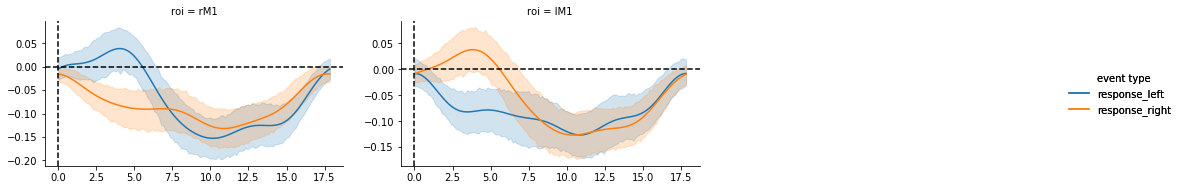

In [12]:
event_types = ['response_left', 'response_right']
df_ = df[['rM1', 'lM1']]
gmodel_full = GroupResponseFitter(df_, 
                                  events, 
                                  confounds=confounds.reset_index(),
                                  input_sample_rate=1/3, concatenate_runs=True)
for event_type in event_types:
    gmodel_full.add_event(event_type, basis_set='fourier', n_regressors=9, interval=[0, 18])

gmodel_full.fit()
fg_full = gmodel_full.plot_groupwise_timecourses(event_types=event_types, ci=95, col_wrap=3, plots='covariate', col='roi')

## preSMA, rIFG, ACC

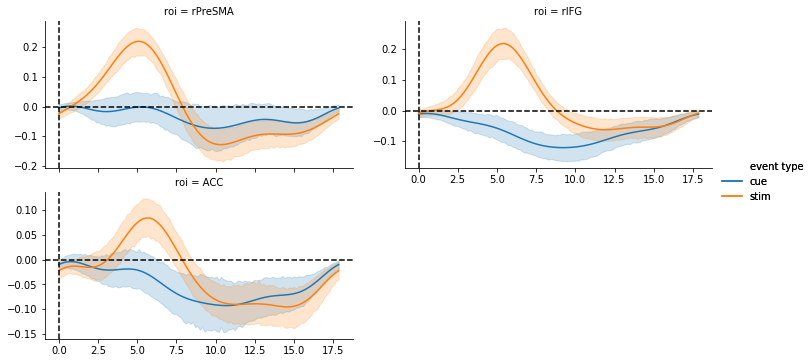

In [24]:
event_types = ['stim', 'cue']
df_ = df[['rPreSMA', 'rIFG', 'ACC']]
gmodel_full = GroupResponseFitter(df_, 
                                  events, 
                                  confounds=confounds.reset_index(),
                                  input_sample_rate=1/3, concatenate_runs=True)
for event_type in event_types:
    gmodel_full.add_event(event_type, basis_set='fourier', n_regressors=9, interval=[0, 18])

gmodel_full.fit()
fg_full = gmodel_full.plot_groupwise_timecourses(event_types=event_types, ci=95, col_wrap=2, plots='covariate', col='roi')

## STR, GPi, GPe

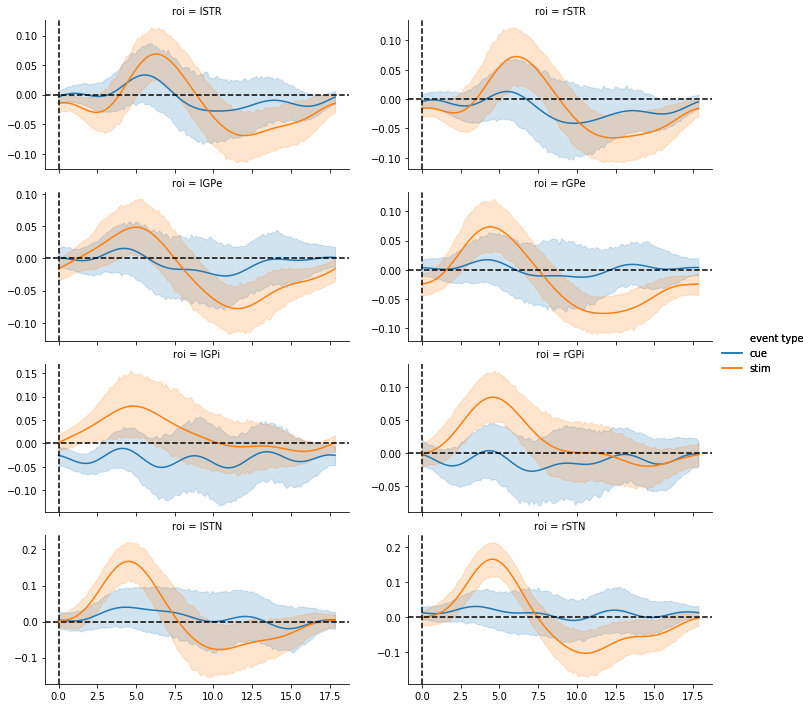

In [23]:
event_types = ['stim', 'cue']
df_ = df[['lSTR', 'rSTR',
          'lGPe', 'rGPe',
          'lGPi', 'rGPi',
          'lSTN', 'rSTN']]
gmodel_full = GroupResponseFitter(df_, 
                                  events, 
                                  confounds=confounds.reset_index(),
                                  input_sample_rate=1/3, concatenate_runs=True)
for event_type in event_types:
    gmodel_full.add_event(event_type, basis_set='fourier', n_regressors=9, interval=[0, 18])

gmodel_full.fit()
fg_full = gmodel_full.plot_groupwise_timecourses(event_types=event_types, ci=95, col_wrap=2, plots='covariate', col='roi')

### So the STNs seem to respond to the presentation of a stimulus, but are not very impressed by the cues or feedback